<a href="https://colab.research.google.com/github/k4404c/tensorflow_workbook/blob/main/tensorflow4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#tensorflow transfer learning: fine tuning
import tensorflow as tf

In [ ]:
#import all the helper functions we have been using previously:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


--2024-05-14 00:23:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-14 00:23:43 (55.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [53]:
#Lets get our data
#we can use pretrained models from tf.keras.application

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip



--2024-05-14 00:48:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 173.194.217.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   178MB/s    in 0.9s    

2024-05-14 00:48:32 (178 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [54]:
unzip_data("10_food_classes_10_percent.zip")
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [55]:
#create training and test directory paths
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"
IMG_SIZE = (224,224)
BATCH_SIZE = 32
import tensorflow as tf
#These will do what the DataGenerator and flow_from_directory have been doing previously
train_data_10 = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                     image_size = IMG_SIZE,
                                                                     label_mode = "categorical",
                                                                     batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                     image_size = IMG_SIZE,
                                                                     label_mode = "categorical",
                                                                     batch_size = BATCH_SIZE)



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10.take(1):
  print(images)
  print(labels)

tf.Tensor(
[[[[5.21581612e+01 2.01581631e+01 9.15816307e+00]
   [5.70969391e+01 2.50969410e+01 1.40969400e+01]
   [5.37142868e+01 1.90714283e+01 9.28571415e+00]
   ...
   [8.38469772e+01 4.00051155e+01 2.40714722e+01]
   [8.19030457e+01 3.72397881e+01 2.35765324e+01]
   [8.28163376e+01 3.83571777e+01 2.53571777e+01]]

  [[5.76887779e+01 2.36887760e+01 1.36887751e+01]
   [6.12908173e+01 2.72908173e+01 1.72908173e+01]
   [5.95000000e+01 2.25000000e+01 1.35000000e+01]
   ...
   [8.33163452e+01 3.66020164e+01 1.99184036e+01]
   [8.55663376e+01 3.85000267e+01 2.25000381e+01]
   [8.83061142e+01 4.09490433e+01 2.65204372e+01]]

  [[5.40051041e+01 1.84336739e+01 6.86224556e+00]
   [5.66275520e+01 2.10561237e+01 9.48469543e+00]
   [5.76938782e+01 1.99081631e+01 9.33673477e+00]
   ...
   [9.41428375e+01 4.41682854e+01 2.53825912e+01]
   [9.50305939e+01 4.46020470e+01 2.61581917e+01]
   [9.32957916e+01 4.34387207e+01 2.67907543e+01]]

  ...

  [[7.82192841e+01 6.32192879e+01 3.02192879e+01]
   [9

In [ ]:
#using keras Functional API, gives us more flexibility

#1 create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top= False)

#2 freeze the base medel
base_model.trainable = False

#3 create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name = "input_layer")

#4 if using ResNet50V2, need to normalize inputs, you dont have to for EffiecentNet its built in
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./244)(inputs)

#5 Pass inputs into base_model
x = base_model(inputs)
print(f"shape after passing inputs: {x.shape}")

#6 Average pool the outputs of the base model (aggregate all the most important information)
x = tf.keras.layers.GlobalAveragePooling2D(name = "golbal_avg_pool")(x)
print(f"shape after global avg pooling: {x.shape}")

#7 Create output activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name = 'output_layer')(x)
print(f"shape after dense output: {x.shape}")

#8 combine the inputs with the outputs into the model
model_0 = tf.keras.Model(inputs,outputs)

#9 compile the model

model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = "accuracy")

his0 = model_0.fit(train_data_10,
            epochs = 5,
            steps_per_epoch= len(train_data_10),
            validation_data = test_data,
            validation_steps = int(0.25 * len(test_data)),
            callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                     experiment_name = "10_percent_feature_extraction")]
            )

24274472/24274472 [==============================] - 0s 0us/step
shape after passing inputs: (None, 7, 7, 1280)
shape after global avg pooling: (None, 1280)
shape after dense output: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20240514-002406
Epoch 1/5
24/24 [==============================] - 22s 376ms/step - loss: 1.9755 - accuracy: 0.3760 - val_loss: 1.3883 - val_accuracy: 0.7155
Epoch 2/5
24/24 [==============================] - 5s 172ms/step - loss: 1.1812 - accuracy: 0.7587 - val_loss: 0.9394 - val_accuracy: 0.7944
Epoch 3/5
24/24 [==============================] - 4s 138ms/step - loss: 0.8659 - accuracy: 0.8187 - val_loss: 0.7314 - val_accuracy: 0.8438
Epoch 4/5
24/24 [==============================] - 5s 204ms/step - loss: 0.6975 - accuracy: 0.8507 - val_loss: 0.6428 - val_accuracy: 0.8586
Epoch 5/5
24/24 [==============================] - 4s 132ms/step - loss: 0.6047 - accuracy: 0.8573 - val_loss: 0.5920 - val_accuracy: 0.8651


In [ ]:
#evaluate on the full test set
m0_stats = model_0.evaluate(test_data)

79/79 [==============================] - 9s 98ms/step - loss: 0.5782 - accuracy: 0.8556


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [ ]:
#summary of base model
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [ ]:
model_0.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 golbal_avg_pool (GlobalAve  (None, 1280)              0         
 ragePooling2D)                                                  
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


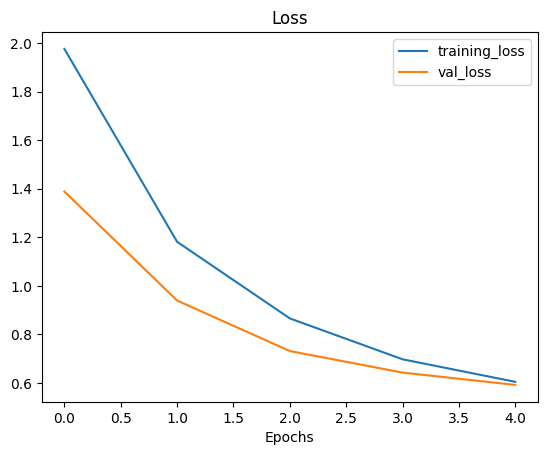

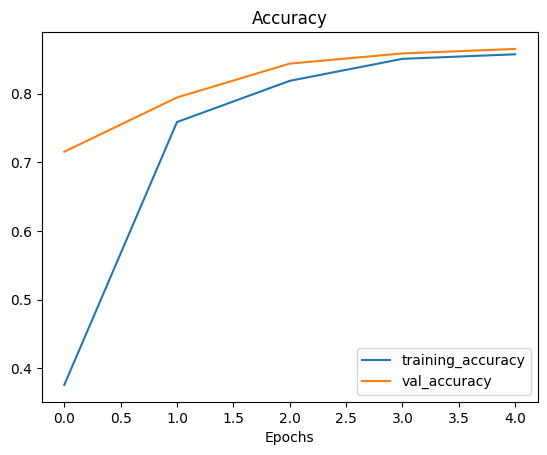

In [ ]:
plot_loss_curves(his0)

In [ ]:
#Model1 use feature extraction transfer learning with data augmentation and 1%
#Model2 use feature extraction transfer learning with data augmentation and 10%
#Model3 use fine tuning transfer learning with data augmentation and 10%
#Model4 use fine tuning transfer learning with data augmentation and 100%


In [ ]:
#Model 1

In [ ]:
#download + unzip data:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2024-05-14 00:25:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  86.3MB/s    in 1.5s    

2024-05-14 00:25:35 (86.3 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There a

In [ ]:
#set up data loaders
train_data_1 = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                   label_mode = "categorical",
                                                                   image_size = IMG_SIZE,
                                                                   batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                   label_mode = "categorical",
                                                                   image_size = IMG_SIZE,
                                                                   batch_size = BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 750 files belonging to 10 classes.


In [ ]:
#adding data augmentation to model
# tf.keras.layers.expirimental.preprocessing()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#create data aug stage with horizontal flipping, rotations, zooms, etc

data_aug = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1./255) if using ResNet
], name = "data_augmentation"
)

#benifits: preproccessing happens on GPU(faster), saving model saves preproccesing,

10_food_classes_10_percent/train/steak/2062248.jpg


(-0.5, 418.5, 350.5, -0.5)

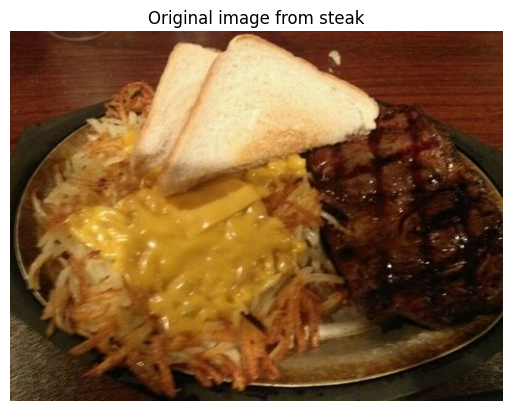

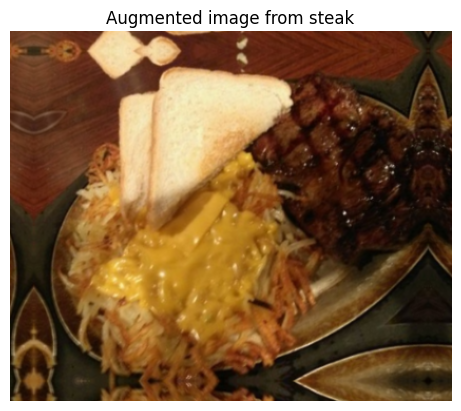

In [ ]:
#Visualize data aug layer

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1.class_names)
target_dir = train_dir + target_class
#print(target_dir)
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image
print(random_image_path)
plt.figure()
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original image from {target_class}")
plt.axis(False);

#augmented image:
plt.figure()
aug_img = data_aug(img, training = True)
plt.imshow(tf.squeeze(aug_img)/ 255.)
plt.title(f"Augmented image from {target_class}")
plt.axis(False)

In [ ]:
#MODEL 1:
input_shape = IMG_SIZE + (3,)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top= False)
base_model.trainable = False

#Create input layer
inputs = layers.Input(shape = input_shape,
                      name = "input_layer")

#Add in data augmentation layer
x = data_aug(inputs)

#Give base_model the inputs (after aug)
x = base_model(x, training=False)

#Pool output features
x = layers.GlobalAveragePooling2D(name = "global_average_pooling")(x) #KEEP IN MIND if model pass x in first (), if layer second, ie
                                       #model(x) .. layer()(x)

#Put dense layer to get outputs
outputs = layers.Dense(10, activation = 'softmax', name = "output_layer")(x)

#make model
model_1 = keras.Model(inputs,outputs)

#compile model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit model:
his1 = model_1.fit(train_data_1,
            epochs = 5,
            steps_per_epoch = len(train_data_1),
            validation_data = test_data,
            validation_steps = len(test_data),
            callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                     experiment_name = "1_percent_data_aug")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240514-002558
Epoch 1/5
3/3 [==============================] - 17s 3s/step - loss: 2.3174 - accuracy: 0.1429 - val_loss: 2.2491 - val_accuracy: 0.1507
Epoch 2/5
3/3 [==============================] - 6s 2s/step - loss: 2.1348 - accuracy: 0.1571 - val_loss: 2.1433 - val_accuracy: 0.2347
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9921 - accuracy: 0.2857 - val_loss: 2.0462 - val_accuracy: 0.3133
Epoch 4/5
3/3 [==============================] - 6s 3s/step - loss: 1.7542 - accuracy: 0.5571 - val_loss: 1.9555 - val_accuracy: 0.4013
Epoch 5/5
3/3 [==============================] - 6s 2s/step - loss: 1.6466 - accuracy: 0.6571 - val_loss: 1.8710 - val_accuracy: 0.4507


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, 3)           0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling (Gl  (None, 1280)              0         
 obalAveragePooling2D)                                           
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

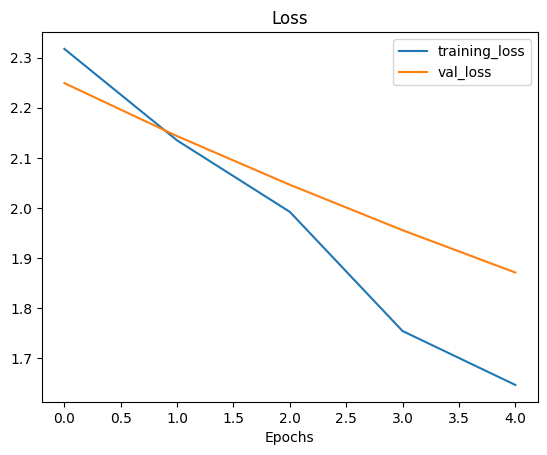

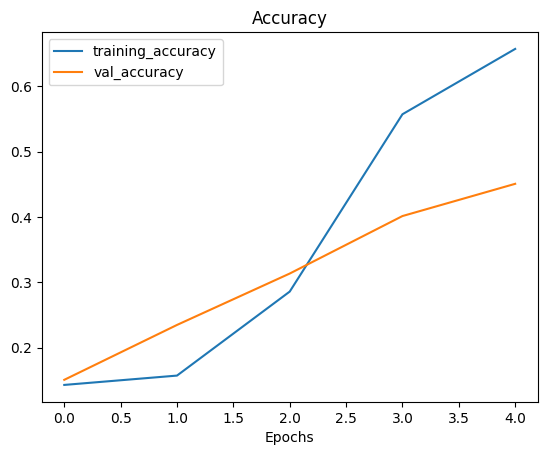

In [ ]:
plot_loss_curves(his1)

In [56]:
#MODEL2 same as model1, but with all the data.
#We already set up the 10% data with model_0
IMG_SIZE = (224,224)
BATCH_SIZE = 32
input_shape = IMG_SIZE + (3,)

data_aug = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1./255) if using ResNet
], name = "data_augmentation"
)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top= False)
base_model.trainable = False

#Create input layer
inputs = layers.Input(shape = input_shape,
                      name = "input_layer")

#Add in data augmentation layer
x = data_aug(inputs)

#Give base_model the inputs (after aug)
x = base_model(x, training=False)

#Pool output features
x = layers.GlobalAveragePooling2D(name = "global_average_pooling")(x) #KEEP IN MIND if model pass x in first (), if layer second, ie
                                       #model(x) .. layer()(x)

#Put dense layer to get outputs
outputs = layers.Dense(10, activation = 'softmax', name = "output_layer")(x)

#make model
model_2 = keras.Model(inputs,outputs)

#compile model
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])



#Creating Model Checkpoint Callback
#set checkpoint path
checkpoint_path = "ten_percent_model_checkpoints/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath= checkpoint_path,
                                                         save_weights = True,
                                                         save_best_only = False,
                                                         save_freq = "epoch",
                                                         verbose = 1)

#fit model:
his2 = model_2.fit(train_data_10,
            epochs = 5,
            steps_per_epoch = len(train_data_10),
            validation_data = test_data,
            validation_steps = len(test_data),
            callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                     experiment_name = "10_percent_data_aug"),
                         checkpoint_callback]
                   )

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240514-004911
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0537 - accuracy: 0.3240
Epoch 1: saving model to ten_percent_model_checkpoints/checkpoint.ckpt
24/24 [==============================] - 64s 2s/step - loss: 2.0537 - accuracy: 0.3240 - val_loss: 1.5026 - val_accuracy: 0.6716
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4070 - accuracy: 0.6493
Epoch 2: saving model to ten_percent_model_checkpoints/checkpoint.ckpt
24/24 [==============================] - 60s 3s/step - loss: 1.4070 - accuracy: 0.6493 - val_loss: 1.0643 - val_accuracy: 0.7432
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1144 - accuracy: 0.7253
Epoch 3: saving model to ten_percent_model_checkpoints/checkpoint.ckpt
24/24 [==============================] - 55s 2s/step - loss: 1.1144 - accuracy: 0.7253 - val_loss: 0.8422 - val_accuracy: 0.8032
Epoch 4/5
24/24 [=================

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling (Gl  (None, 1280)              0         
 obalAveragePooling2D)                                           
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

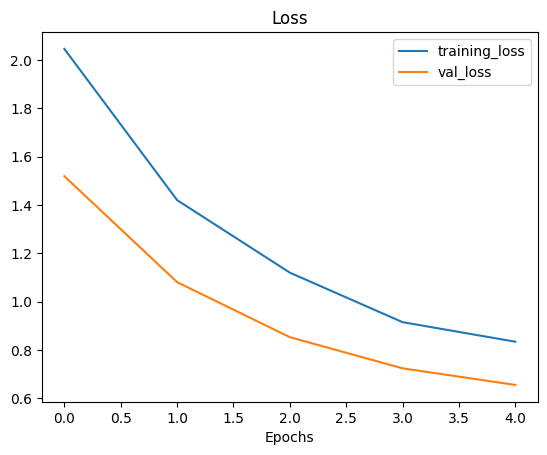

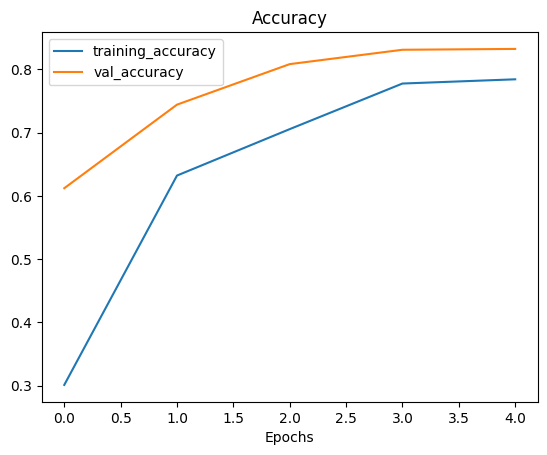

In [ ]:
plot_loss_curves(his2)

In [ ]:
#Loading in checkpointed weights
model_2.evaluate(test_data)


24/24 [==============================] - 2s 59ms/step - loss: 0.6553 - accuracy: 0.8320


[0.6553415656089783, 0.8320000171661377]

In [ ]:
#evaluates model with loaded weighs:
model_2.load_weights(checkpoint_path)
model_2.evaluate(test_data)

24/24 [==============================] - 2s 61ms/step - loss: 0.6553 - accuracy: 0.8320


[0.6553415656089783, 0.8320000171661377]

In [ ]:
#results are more or less the same, very close!

In [ ]:
#Model 3, same as model 2, but we will do fine tuning.
#fine tuning usually works best after training a feature extraction model for a few epochs, so model 3
#is like training model 2 for a few more epochs with trainable off



In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
# to begin fine-tuning, lets begin by setting last 10 layers of base model to trainable.
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False


In [ ]:
for i , layer in enumerate(base_model.layers):
  print(i , layer.name, layer.trainable) #now we have unfrozen some variables

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(0.0001),
                metrics = ["accuracy"])

#rule of thumb for fine-tuning: lower learning rate by 10x

In [ ]:
fine_tune_epochs = 5 + 5
his3 = model_2.fit(train_data_10,
                  epochs = fine_tune_epochs,
                  steps_per_epoch = len(train_data_10),
                  validation_data = test_data,
                  validation_steps = len(test_data),
                  initial_epoch=his2.epoch[-1],
                  callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                           experiment_name="10_percent_fine_tune_last_10")]
                   )

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20240514-003410
Epoch 5/10
24/24 [==============================] - 33s 859ms/step - loss: 0.6969 - accuracy: 0.7973 - val_loss: 0.5091 - val_accuracy: 0.8533
Epoch 6/10
24/24 [==============================] - 19s 774ms/step - loss: 0.6124 - accuracy: 0.8093 - val_loss: 0.4682 - val_accuracy: 0.8520
Epoch 7/10
24/24 [==============================] - 19s 765ms/step - loss: 0.5181 - accuracy: 0.8333 - val_loss: 0.4297 - val_accuracy: 0.8680
Epoch 8/10
24/24 [==============================] - 17s 698ms/step - loss: 0.5044 - accuracy: 0.8293 - val_loss: 0.4061 - val_accuracy: 0.8707
Epoch 9/10
24/24 [==============================] - 17s 695ms/step - loss: 0.4657 - accuracy: 0.8493 - val_loss: 0.3853 - val_accuracy: 0.8747
Epoch 10/10
24/24 [==============================] - 22s 895ms/step - loss: 0.4109 - accuracy: 0.8680 - val_loss: 0.3583 - val_accuracy: 0.8933


In [ ]:
#evaluate fine-tuned results of model 3 (model 2 with 5 more fine tuned epochs)
results_3 = model_2.evaluate(test_data)

24/24 [==============================] - 2s 59ms/step - loss: 0.3583 - accuracy: 0.8933


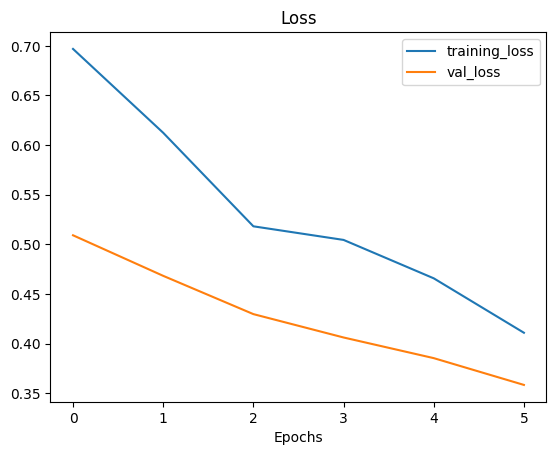

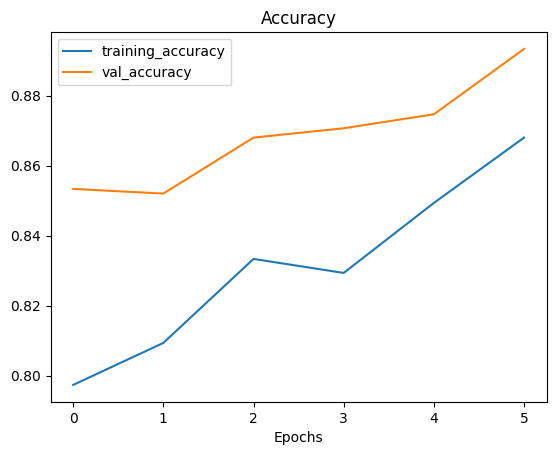

In [ ]:
plot_loss_curves(his3)

In [ ]:
#create function for 'plot_loss_curves' with fine tuning
def compare_his(original_history, new_history, initial_epochs = 5):
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]
  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]
  total_acc_val = val_acc + new_history.history["val_accuracy"]
  total_loss_val = val_loss + new_history.history["val_loss"]

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label = "Training Accuracy")
  plt.plot(total_acc_val, label = "Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = "Start Fine Tuning")
  plt.legend(loc = "lower right")
  plt.title("Training and Validation Accuracy")

  plt.subplot(2,1,2)
  plt.plot(total_loss, label = "Training Loss")
  plt.plot(total_loss_val, label = "Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = "Start Fine Tuning")
  plt.legend(loc = "upper right")
  plt.title("Training and Validation Loss")



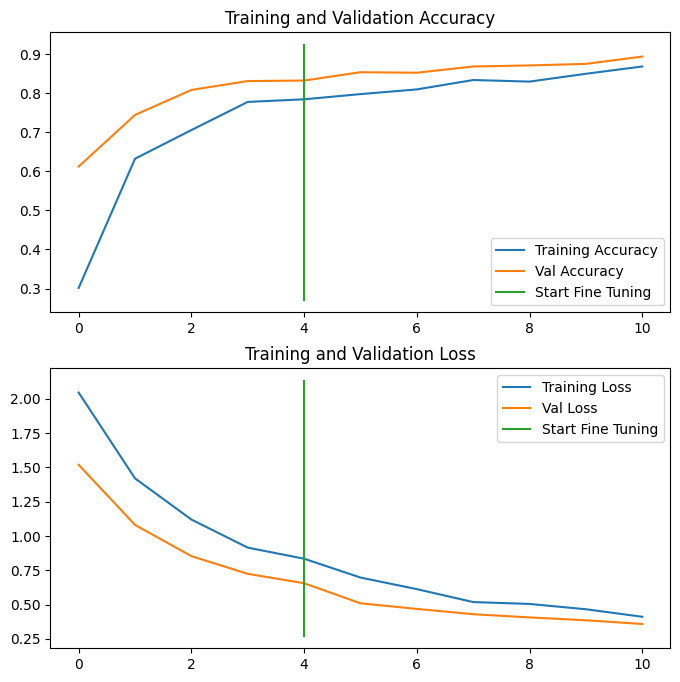

In [ ]:
compare_his(his2, his3,initial_epochs=5)

In [66]:
#Model 4, same as 3, but now we are going to use ALL data
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2024-05-14 01:08:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  88.4MB/s    in 8.4s    

2024-05-14 01:08:36 (58.9 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [67]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.

In [79]:
#Setup data inputs

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"
import tensorflow as tf
IMG_SIZE = (244,244)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = "categorical",
                                                                 image_size = IMG_SIZE,
                                                                 batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode = "categorical",
                                                                 image_size = IMG_SIZE,
                                                                 batch_size = BATCH_SIZE)

10_food_classes_all_data/train/
10_food_classes_all_data/test/
Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#To train a fine-tuning model, we need to revert model_2 back to its feature extraction weights
#We can load it from the checkpoint
model_2.evaluate(test_data)

79/79 [==============================] - 12s 100ms/step - loss: 0.4240 - accuracy: 0.8584


[0.42399120330810547, 0.8583999872207642]

In [ ]:
model_2.load_weights(checkpoint_path)

ValueError: Received incompatible tensor with shape (1280, 10) when attempting to restore variable with shape (1, 1, 1152, 48) and name Adam/m/block6h_se_reduce/kernel:0.

In [97]:
#We need to get the 10 percent data again because we augmented it, its dimensions are wonky and wont work unless we remove layer

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")
walk_through_dir("10_food_classes_10_percent")
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"
IMG_SIZE = (224,224)
BATCH_SIZE = 32
import tensorflow as tf
#These will do what the DataGenerator and flow_from_directory have been doing previously
train_data_10 = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                     image_size = IMG_SIZE,
                                                                     label_mode = "categorical",
                                                                     batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                     image_size = IMG_SIZE,
                                                                     label_mode = "categorical",
                                                                     batch_size = BATCH_SIZE)






--2024-05-14 01:41:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.207, 172.217.203.207, 142.250.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.8’

10_food_classes_10_ 100%[===================>] 160.74M   159MB/s    in 1.0s    

2024-05-14 01:41:09 (159 MB/s) - ‘10_food_classes_10_percent.zip.8’ saved [168546183/168546183]

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images 

In [101]:
#The above does not work likely because of an issue related to unlocking the trainable layers
#I am going to simply recreate the model to pass this.

IMG_SIZE = (224,224)
BATCH_SIZE = 32
input_shape = IMG_SIZE + (3,)

print(input_shape)

data_aug = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1./255) if using ResNet
], name = "data_augmentation"
)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top= False)
base_model.trainable = False

#Create input layer
inputs = layers.Input(shape = input_shape,
                      name = "input_layer")

#Add in data augmentation layer
x = data_aug(inputs)

#Give base_model the inputs (after aug)
x = base_model(x, training=False)

#Pool output features
x = layers.GlobalAveragePooling2D(name = "global_average_pooling")(x) #KEEP IN MIND if model pass x in first (), if layer second, ie
                                       #model(x) .. layer()(x)

#Put dense layer to get outputs
outputs = layers.Dense(10, activation = 'softmax', name = "output_layer")(x)

#make model
model_pre_fine = keras.Model(inputs,outputs)

#compile model
model_pre_fine.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


#fit model:
his_pre_fine = model_pre_fine.fit(train_data_10,
            epochs = 5,
            steps_per_epoch = len(train_data_10),
            validation_data = test_data,
            validation_steps = len(test_data),
            callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                     experiment_name = "pre_fine")]
                   )

(224, 224, 3)
Saving TensorBoard log files to: transfer_learning/pre_fine/20240514-014215
Epoch 1/5
24/24 [==============================] - 27s 772ms/step - loss: 1.9746 - accuracy: 0.3600 - val_loss: 1.4777 - val_accuracy: 0.6128
Epoch 2/5
24/24 [==============================] - 15s 623ms/step - loss: 1.4023 - accuracy: 0.6480 - val_loss: 1.0747 - val_accuracy: 0.7232
Epoch 3/5
24/24 [==============================] - 20s 839ms/step - loss: 1.1035 - accuracy: 0.7413 - val_loss: 0.8616 - val_accuracy: 0.7772
Epoch 4/5
24/24 [==============================] - 17s 720ms/step - loss: 0.9294 - accuracy: 0.7707 - val_loss: 0.7552 - val_accuracy: 0.7940
Epoch 5/5
24/24 [==============================] - 14s 583ms/step - loss: 0.8194 - accuracy: 0.7973 - val_loss: 0.6642 - val_accuracy: 0.8224


In [60]:
model_pre_fine.evaluate(test_data)

79/79 [==============================] - 8s 86ms/step - loss: 0.6714 - accuracy: 0.8184


[0.6713922619819641, 0.8184000253677368]

In [61]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False
for i , layer in enumerate(base_model.layers):
  print(i , layer.name, layer.trainable) #now we have unfrozen some variables

0 input_14 False
1 rescaling_13 False
2 normalization_13 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwcon

In [63]:
for layer_number, layer in enumerate(model_pre_fine.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 True
3 global_average_pooling True
4 output_layer True


In [64]:
for layer_number, layer in enumerate(model_pre_fine.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_14 False
1 rescaling_13 False
2 normalization_13 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwcon

In [91]:
#Setup data inputs
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")
walk_through_dir("10_food_classes_10_percent")
# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"
IMG_SIZE = (244,244)
BATCH_SIZE = 32
import tensorflow as tf
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "categorical",
                                                                 batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "categorical",
                                                                 batch_size = BATCH_SIZE)

model_pre_fine.compile(loss = 'categorical_crossentropy',
                       optimizer = tf.keras.optimizers.Adam(0.0001),
                       metrics = ['accuracy'])
fine_tuned_epochs = 5+5
his5 = model_pre_fine.fit(train_data,
                          epochs = fine_tuned_epochs,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data),
                          initial_epoch = his_pre_fine.epoch[-1],
                          callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                   experiment_name = "fine_tune_all")])



--2024-05-14 01:31:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.207, 74.125.196.207, 74.125.134.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.4’

10_food_classes_all 100%[===================>] 495.13M  28.1MB/s    in 11s     

2024-05-14 01:31:26 (44.9 MB/s) - ‘10_food_classes_all_data.zip.4’ saved [519183241/519183241]

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_13" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 244, 244, 3)


In [ ]:
#I have absolutely no clue why the above will not work and have given up